In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('adult.csv')

In [7]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропущенные значения обозначены вопросами - надо заменить их на null

In [17]:
df.replace(['?'], [None], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Волюнтаристки удалим все строки с пустыми ячейками

In [21]:
df.dropna(inplace=True)

In [25]:
df.reset_index(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 16 columns):
index              45222 non-null int64
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Потеряли около 3.5к записей, что менее 10%.

In [27]:
df.describe()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,14092.966862,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,12206.250000,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,24470.000000,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,36629.750000,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
df.head(10)

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


Разобьем данные на X и y

In [33]:
X = df.loc[:, df.columns != 'income']

In [41]:
y = df[df.columns[-1]]

Посмотрим, какие значения принимает целевой атрибут

In [42]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Заменим в целевом атрибуте '>50K' на 1 и '<=50K' на 0

In [43]:
y.replace('>50K', 1, inplace=True)
y.replace('<=50K', 0, inplace=True)

Разделим выборку на тренировочную и валидационную.

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

Разделим признаки на числовые и категориальные

In [47]:
num_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Получим список значений для всех категорий, для OneHotEncoder-а

In [48]:
def get_cat_categories(df, cat_columns):
    categories = []
    for column in cat_columns:
        categories.append(list(df[column].unique()))    
    return categories

In [50]:
categories = get_cat_categories(df, cat_columns)

Категориальные признаки обрабатываем OneHotEncoder-ом, численные пропускаем через StandardScaler

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=categories), cat_columns),
        ('num', StandardScaler(), num_columns)
    ],
    sparse_threshold=0,
    remainder='drop'
)

Соберем пайплайн

In [58]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

А теперь все это запихнем в гридсерч

In [61]:
grid_params = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__penalty': ['l1', 'l2']
}

In [63]:
grid = GridSearchCV(clf, param_grid=grid_params, n_jobs=-1, cv=10)

In [64]:
grid.fit(X, y)

/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0,
         transformer_weights=None,
         transformers=[('cat', OneHotEncoder(categorical_features=None,
       categories=[['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-em...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'classifier__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
grid.best_score_

0.8485692804387245

In [66]:
grid.best_params_

{'classifier__C': 1.0, 'classifier__penalty': 'l2'}

In [67]:
model = grid.best_estimator_

Посмотрим на остатки

In [72]:
model.named_steps['classifier'].intercept_

array([-1.27177317])

Заберем название фичей из препроцессора

In [74]:
def get_feature_names(column_transformer, df):
    feature_names = []
    for _, tr, columns in column_transformer.transformers:
        if type(tr).__name__ == 'OneHotEncoder':
            tr.fit(df[columns]) # wtf?? удивительно, но факт, но ColumnTransformer сначала клонирует незафиченный непосредственно трансформер, а потом его выполняет
            feature_names.extend(list(tr.get_feature_names(columns)))
        elif type(tr).__name__ == 'StandardScaler':
            feature_names.extend(columns)
        else:
            raise RuntimeError(f'Unknown class: {type(tr).__name__}, plrase update function')
    return feature_names

In [75]:
feature_names = get_feature_names(model.named_steps['preprocessor'], X)

In [81]:
len(feature_names)

104

In [82]:
df_coef = pd.DataFrame()
df_coef['Features'] = pd.Series(feature_names)
df_coef['Coef'] = model.named_steps['classifier'].coef_[0]

Посмотрим на максимально влияющие признаки

In [88]:
df_coef.sort_values(by=['Coef']).head(10)

,Features,Coef
71,native-country_Columbia,-1.469525
40,occupation_Priv-house-serv,-1.334568
23,marital-status_Never-married,-1.217275
70,native-country_South,-1.070363
56,gender_Female,-0.988568
44,relationship_Own-child,-0.977513
31,occupation_Farming-fishing,-0.943758
69,native-country_Vietnam,-0.866870
33,occupation_Other-service,-0.853726
49,relationship_Other-relative,-0.822078


In [87]:
df_coef.sort_values(by=['Coef'], ascending=False).head(10)

,Features,Coef
101,capital-gain,2.377785
29,marital-status_Married-AF-spouse,1.415064
24,marital-status_Married-civ-spouse,1.357750
62,native-country_Ireland,0.850459
48,relationship_Wife,0.836468
82,native-country_Portugal,0.827215
37,occupation_Exec-managerial,0.793470
96,native-country_France,0.767312
80,native-country_Italy,0.755159
74,native-country_Cambodia,0.729089


Пробуем на валидационной выборке

In [90]:
y_pred = model.predict(X_val)

/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [70]:
model.score(X_val, y_val)

/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


0.8511885019347706

Даже немного лучше, чем на трейне

Нарисуем ROC AUC

In [89]:
def plt_roc_auc(title, fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC {roc_auc_train}')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC {roc_auc_test}')
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()    

In [93]:
y_pred_train = model.predict(X_train)

/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [95]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_val, y_pred)
roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_val, y_pred)

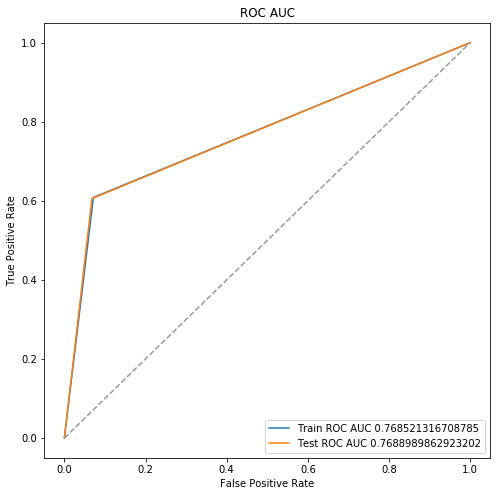

In [96]:
plt_roc_auc('ROC AUC', fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test)